In [1]:
from csoundengine import *

In [2]:
s = Engine().session()




--Csound version 6.19 (double samples) Jan 19 2025
[commit: 2536da284dd70ec7272040cb0763f70ae57123c4]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


In [3]:
s.defInstr('foo', r'''
; foo instr
; Args:
;   kfreq: frequency
if changed2(kfreq) == 1 then
    println "kfreq: %f", kfreq
endif
outch 1, oscili:a(0.1, kfreq) * linsegr:a(0, 0.01, 1, 0.01, 0)
''', args={'kfreq': 800})


Instr(foo, kfreq=800)

In [4]:
sy = s.sched('foo', 0, 10, kfreq=1000)
sy

Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ foo=501.0002 start=0.467 dur=10.000 p5=1000)

In [5]:
sy.playing()

True

In [6]:
sy.set(kfreq=450)

kfreq: 450.000000


In [7]:
sy.set(kfreq=400, delay=0.5)

kfreq: 400.000000



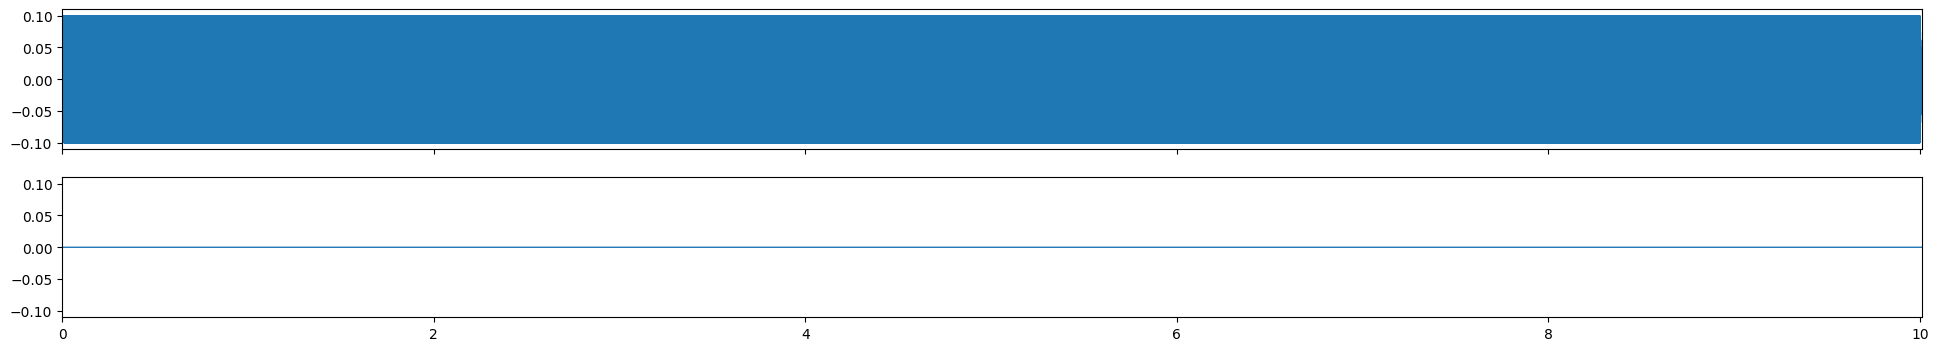

In [8]:
with s.rendering() as r:
    sy = s.sched('foo', 0, 10, kfreq=1000)
    sy.set(kfreq=400, delay=0.5)
    sy.set(kfreq=800, delay=1.5)
r

In [5]:
from csoundengine import *
r = OfflineSession()

In [6]:
r.defInstr('vco', r'''
ifreqbus = p5
kfreq = busin:k(ifreqbus)
if changed(kfreq) == 1 then
    println "kfreq: %f", kfreq
endif
asig vco2 0.1, kfreq
outch 1, asig
''')

Instr(vco, ifreqbus:5)


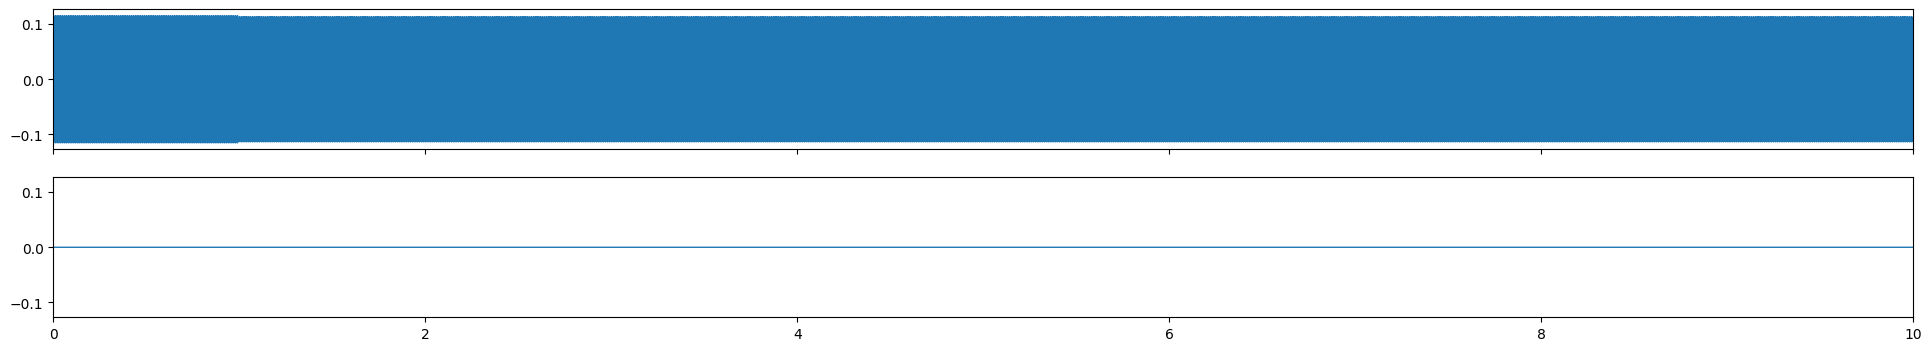

In [7]:
freqbus = r.assignBus(value=500)
s1 = r.sched('vco', 0, 10, ifreqbus=freqbus)
freqbus.set(1000, delay=1)
r.render("~/tmp/vcotest.wav")
r


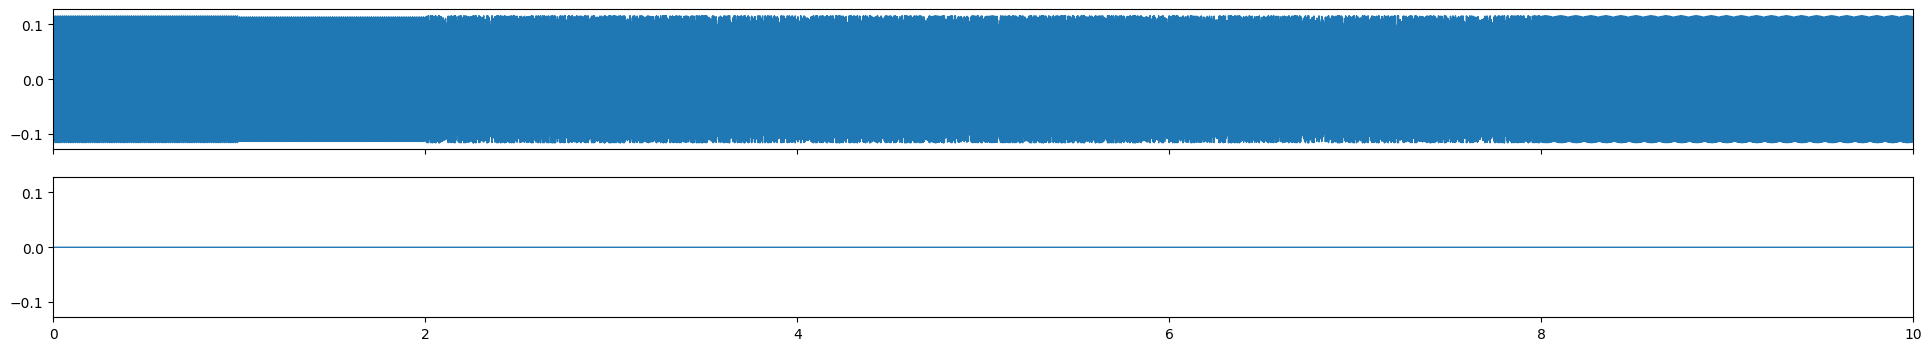

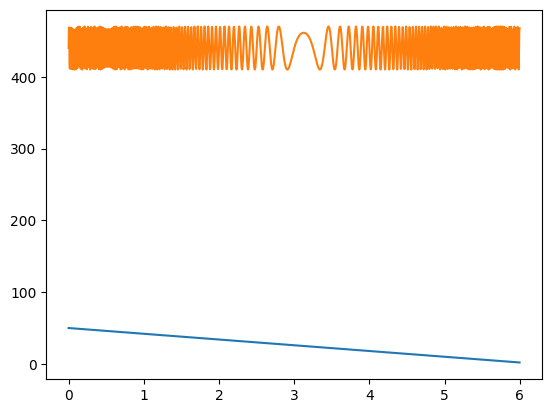

In [3]:
from csoundengine import *
from matplotlib import pyplot as plt
import numpy as np
import bpf4

r = OfflineSession()
r.defInstr('vco', r'''
ifreqbus = p5
kfreq = busin:k(ifreqbus)
asig vco2 0.1, kfreq
outch 1, asig
''')

freqbus = r.assignBus(value=500)
s1 = r.sched('vco', 0, 10, ifreqbus=freqbus)
dur = 6
vibfreq = bpf4.linear(0, 50, dur, 2)
times = np.arange(0, dur, 0.004)
vibfreqs = vibfreq.map(times)
freqs = np.sin(times*2*np.pi*vibfreqs) * 30 + 440
freqbus.set(1000, delay=1)
freqbus.automate((times, freqs), delay=2)
r.render("~/tmp/vcotest.wav")
plt.plot(times, vibfreqs)
plt.plot(times, freqs)
r



In [ ]:
r = Session()

In [5]:


r.defInstr('vco', r'''
ifreqbus = p5
kfreq = busin:k(ifreqbus)
asig vco2 0.1, kfreq
outch 1, asig
''')

freqbus = r.assignBus(value=500)
s1 = r.sched('vco', 0, 10, ifreqbus=freqbus)
dur = 6
vibfreq = bpf4.linear(0, 2, dur*0.5, 40, dur, 2)
times = np.arange(0, dur, 0.004)
vibfreqs = vibfreq.map(times)
freqs = np.sin(times*2*np.pi*vibfreqs) * 30 + 440
freqbus.set(1000, delay=1)
freqbus.automate((times, freqs), delay=2)



In [6]:
from csoundengine import *
import numpy as np
import bpf4

s = Engine().session()

s.defInstr('vco', r'''
ifreqbus = p5
kfreq = busin:k(ifreqbus)
asig vco2 0.1, kfreq
outch 1, asig
''')





--Csound version 6.19 (double samples) Jan 19 2025
[commit: 2536da284dd70ec7272040cb0763f70ae57123c4]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


Instr(vco, ifreqbus:5)

In [7]:
freqbus = s.assignBus(value=500)
dur = 6
s1 = s.sched('vco', 0, dur+1, ifreqbus=freqbus)
times = np.arange(0, dur, 0.004)
freq = bpf4.halfcos(0, 440, dur*0.5, 880, dur, 440)
freqs = freq.map(times)
freqbus.automate((times, freqs), delay=0)


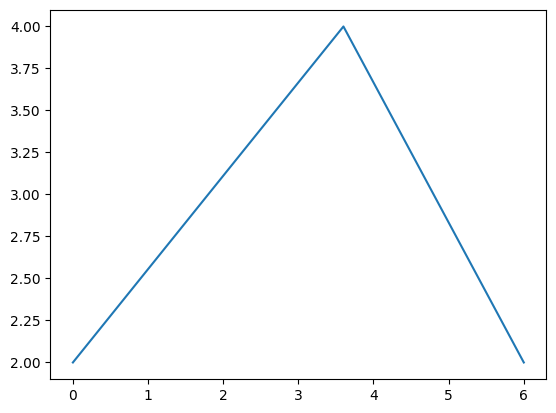

In [8]:
freqbus = s.assignBus(value=440)
dur = 6
s1 = s.sched('vco', 0, dur, ifreqbus=freqbus)

# vibfreq = bpf4.halfcos(0, 2, dur*0.5, 10, dur, 2)
vibfreq = bpf4.linear(0, 2, dur*0.6, 4, dur, 2)

vibfreq.plot()
times = np.arange(0, dur, 0.05)
vibfreqs = vibfreq.map(times)
freqs = np.sin(times*(2*3.141592)*vibfreqs) * 10 + 440
# freqbus.set(1000, delay=1)
freqbus.automate((times, freqs), delay=0)


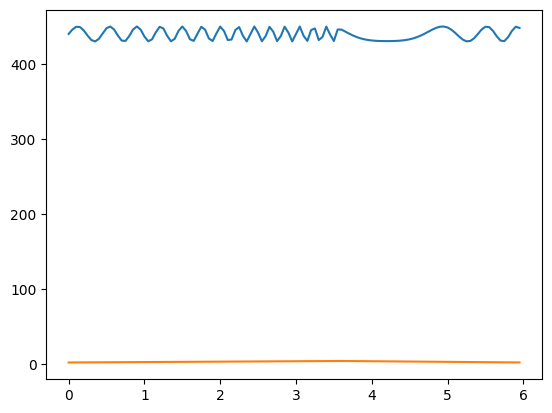

In [9]:
from matplotlib import pyplot as plt
plt.plot(times, freqs)
plt.plot(times, vibfreqs)

In [10]:
r.defInstr('sender', r'''
ibus = p5
ifreqbus = p6
kfreq = busin:k(ifreqbus)
if changed(kfreq) == 1 then
    println "kfreq: %f", kfreq
endif
asig vco2 0.1, kfreq
busout(ibus, asig)
''')

r.defInstr('receiver', r'''
ibus  = p5
kgain = p6
asig = busin:a(ibus)
asig *= a(kgain)
outch 1, asig
''')


Instr(receiver, ibus:5, kgain:6)

RenderJob(outfile='/tmp/tmpl381nc_f.wav', samplerate=44100, encoding='float32', starttime=0.0, endtime=10, process=<Popen: returncode: 0 args: ['/usr/local/bin/csound', '-o', '/tmp/tmpl381nc_...>)
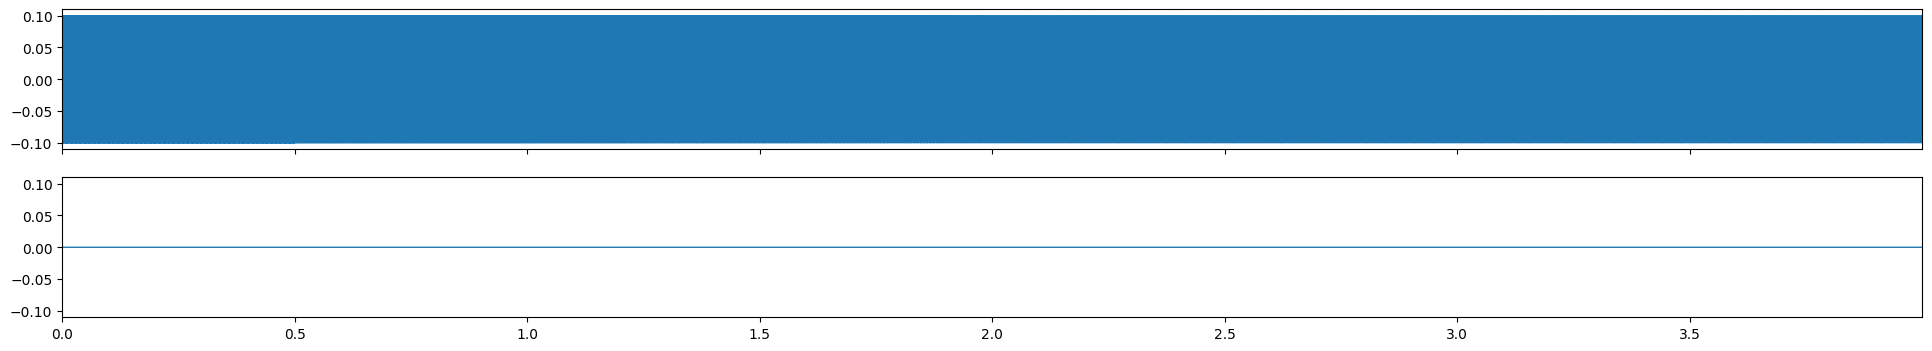

In [11]:
from csoundengine import *

r = OfflineSession()
r.defInstr('testautom', r'''
|kfreq=1000|
outch 1, oscili:a(0.1, kfreq)
''')

ev = r.sched('testautom', 0, 4)
ev.automate('kfreq', (0.5, 500, 2, 300))
r.render(endtime=10)

RenderJob(outfile='/tmp/tmpao62z4pp.wav', samplerate=44100, encoding='float32', starttime=0.0, endtime=20, process=<Popen: returncode: 0 args: ['/usr/local/bin/csound', '-o', '/tmp/tmpao62z4p...>)
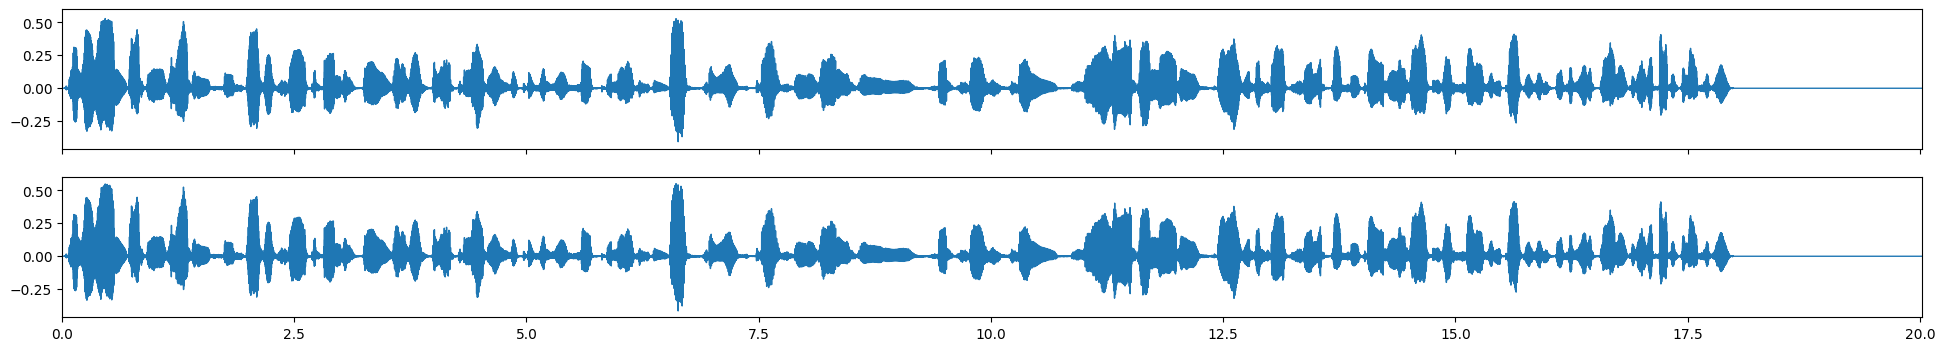

In [5]:
from csoundengine import *

r = OfflineSession(numAudioBuses=0, numControlBuses=0)
ev = r.playSample("/home/em/Lib/snd/samples/speech/finneganswake-fragm01.flac", dur=-1)
ev.automate('kspeed', (0, 1, 2, 1, 10, 0.5, 14, 1, 16, 1, 18, 2))
r.writeCsd('~/tmp/playsample.csd')
r.render(endtime=20)



In [6]:
from csoundengine import *

r = Engine().session()
ev = r.playSample("/home/em/Lib/snd/samples/speech/colours-german-male-1.flac", dur=-1)
ev.automate('kspeed', (0, 1, 2, 1, 10, 0.5))
ev





--Csound version 6.19 (double samples) Jan 19 2025
[commit: 2536da284dd70ec7272040cb0763f70ae57123c4]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

automating p1: 501.000200, index: 8, iovertake: 0, lenpairs: 6, dur: 10.001333


Synth(▶ .diskin=501.0002 start=0.201 dur=-1.000 p5=/home/em/Lib/snd/samples/speech/colours-german-male-1.flac Spath=1 ichan=1 kgain=1 kspeed=0.5 kpan=0.02 ifadein=0.02 ifadeout=0 iloop=0 istart=4)